<a href="https://colab.research.google.com/github/uto4ka101/First/blob/main/Tree_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.tree import export_graphviz

Text(0, 0.5, 'Цена $/Мбайт')

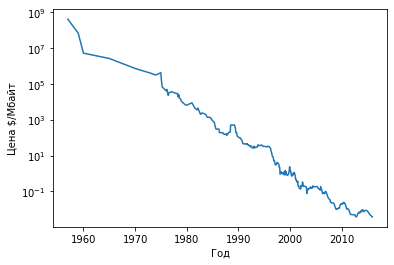

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
ram_prices = pd.read_csv('/content/drive/My Drive/ram_price.csv')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Год")
plt.ylabel("Цена $/Мбайт")

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
data_train = ram_prices[ram_prices.date<2000]
data_test = ram_prices[ram_prices.date>=2000]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':


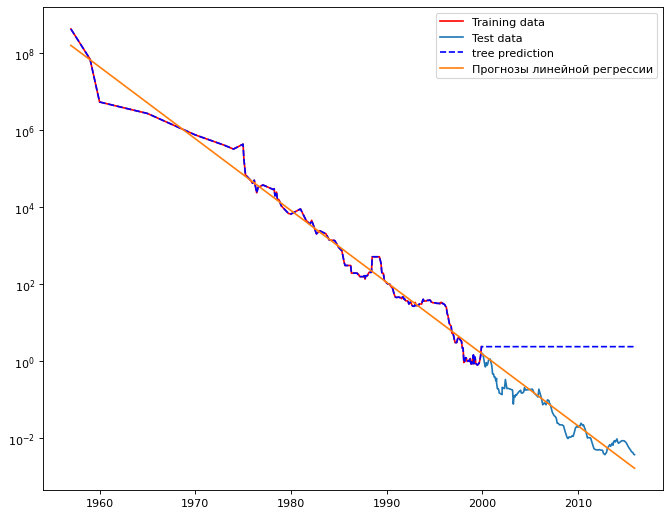

In [ ]:
# Прогноз цены по дате
X_train = data_train.date[:,np.newaxis] # np.newaxis - увеличить размер, например с 1 до 2
y_train = np.log(data_train.price) # Здесь np.log () - логарифм, основанный на e

tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# Прогнозировать все данные
X_all = ram_prices.date[:,np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# Провести обратную операцию логарифмического преобразования
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)
# Результаты предсказания дерева решений по сравнению с реальными значениями
plt.figure(figsize=(10,8),dpi=80)
plt.semilogy(data_train.date,data_train.price,'r',label='Training data')
plt.semilogy(data_test.date,data_test.price,label='Test data')
plt.semilogy(ram_prices.date,price_tree,'--b',label='tree prediction')
plt.semilogy(ram_prices.date, price_lr, label="Прогнозы линейной регрессии")
plt.legend()
plt.show()